  ॐ श्री गणेशाय नम:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_excel("housing.xlsx")

##### Dataset Description:
| Field | Type    | Description |
| :---: |:---: |:--
| longitude |(Signed numeric - float) | Longitude value for the block in California, USA |
| latitude     |(numeric - float) | Latitude value for the block in California, USA |
| housing_median_age |(numeric-int)| Median age of the house in the block |
| total_rooms |(numeric-int) | Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_rooms |(numeric-int) | Count of the total number of rooms (excluding bedrooms) in all houses in the block |
| total_bedrooms |(numeric - float)| Count of the total number of bedrooms in all houses in the block |
| population |(numeric-float) | Count of the total number of bedrooms in all houses in the block |
| households |(numeric - int) | Count of the total number of population in the block |
| median_income |(numeric - float) | Median of the total household income of all the houses in the block |
| ocean_proximity |(numeric - int) |Median of the household prices of all the houses in the use_value block |


In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


* There are 20640 instances & 'total_bedrooms' has only 20433 non-null values (207 values missing)

In [5]:
for item in housing.columns:
    print(item,":", housing[item].nunique())

longitude : 844
latitude : 862
housing_median_age : 52
total_rooms : 5926
total_bedrooms : 1923
population : 3888
households : 1815
median_income : 12928
ocean_proximity : 5
median_house_value : 3842


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


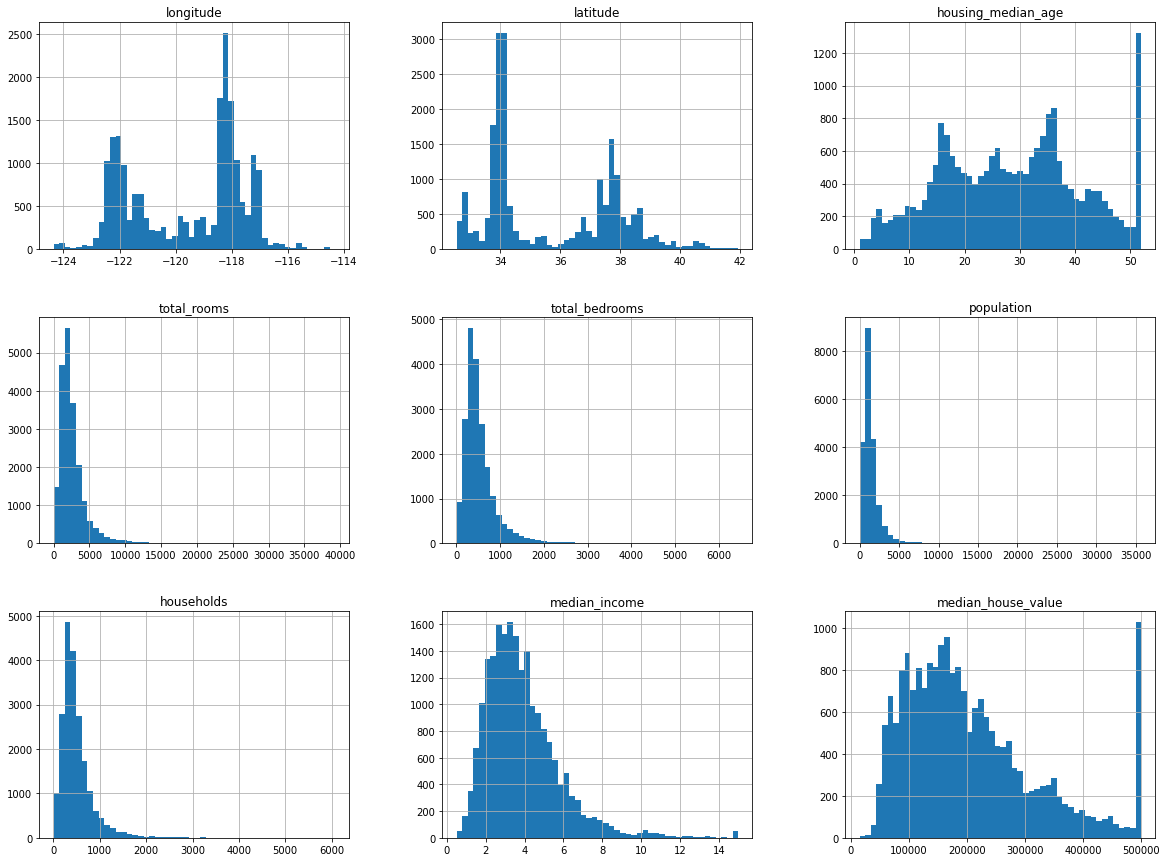

In [8]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

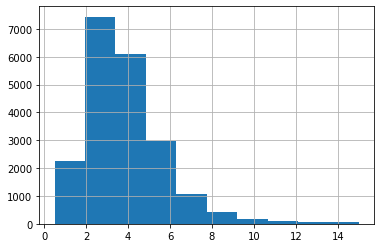

In [9]:
# median income looks like an imp feature

housing['median_income'].hist()

In [10]:
# dividing the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
print(housing['income_cat'].unique())
# putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)
housing['income_cat'].unique()

[ 6.  5.  4.  3.  2.  1.  8.  7.  9. 11. 10.]


array([5., 4., 3., 2., 1.])

* StratifiedShuffleSplit is a combination of both ShuffleSplit and StratifiedKFold. Using StratifiedShuffleSplit the proportion of distribution of class labels is almost even between train and test dataset. 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=29)

In [13]:
train_set['income_cat'].value_counts()/ len(train_set)

3.0    0.352047
2.0    0.320676
4.0    0.174964
5.0    0.113190
1.0    0.039123
Name: income_cat, dtype: float64

In [14]:
test_set['income_cat'].value_counts()/ len(test_set)

3.0    0.344719
2.0    0.311531
4.0    0.181686
5.0    0.119428
1.0    0.042636
Name: income_cat, dtype: float64

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_cat, dtype: float64

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [18]:
def icatogary_proportions(data):
    return data["income_cat"].value_counts()/len(data)

comparing_props = pd.DataFrame({"Overall": icatogary_proportions(housing),
                                "Random sampling" :icatogary_proportions(test_set),
                                "strat. sampling":icatogary_proportions(strat_test_set)
                               }).sort_index()

comparing_props["% random error"] = 100 * comparing_props["Random sampling"] / comparing_props["Overall"] - 100
comparing_props["% strat. error"] = 100 * comparing_props["strat. sampling"] / comparing_props["Overall"] - 100
comparing_props                        

,Overall,Random sampling,strat. sampling,% random error,% strat. error
1.0,0.039826,0.042636,0.039971,7.055961,0.364964
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114341,4.360711,-0.084674


**as seen above the proportions are maintained in the test set using stratified sampling**

**[why stratified?]** : because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class

In [19]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [20]:
housing = strat_train_set.copy()

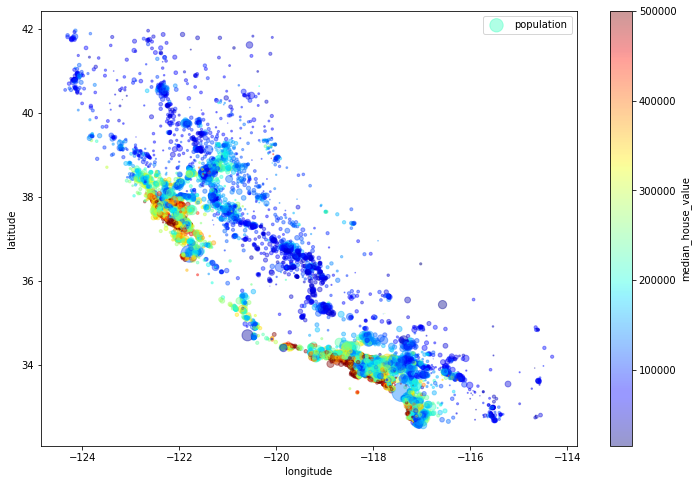

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

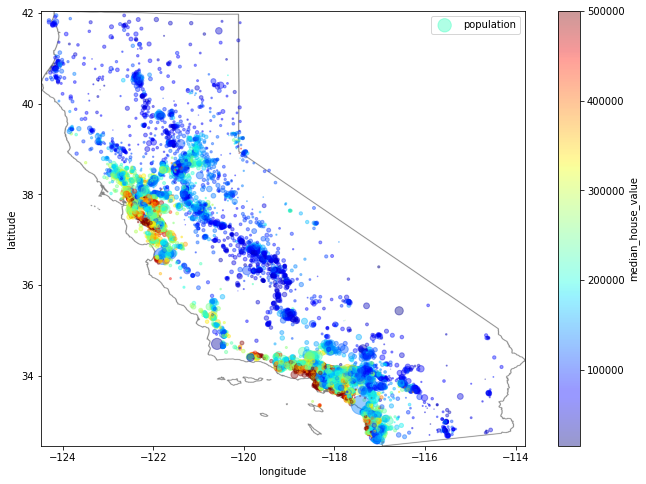

In [22]:
import matplotlib.image as mping

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# Load the png image
california_img= mping.imread("california.png")
plt.imshow(california_img, extent=[-124.48, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.legend()


* **Correlation**

Define the correlation -1(less correlation) and 1(highly correlated)

In [23]:
Correlation = housing.corr()
Correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924725,-0.105869,0.040843,0.067186,0.094512,0.051620,-0.016579,-0.043977
latitude,-0.924725,1.000000,0.007830,-0.031908,-0.064301,-0.104621,-0.067926,-0.079700,-0.146227
housing_median_age,-0.105869,0.007830,1.000000,-0.361659,-0.319868,-0.293619,-0.301472,-0.112612,0.108481
total_rooms,0.040843,-0.031908,-0.361659,1.000000,0.930298,0.855529,0.918086,0.189732,0.127498
total_bedrooms,0.067186,-0.064301,-0.319868,0.930298,1.000000,0.877212,0.979905,-0.013996,0.043991
population,0.094512,-0.104621,-0.293619,0.855529,0.877212,1.000000,0.906145,-0.001498,-0.028239
households,0.051620,-0.067926,-0.301472,0.918086,0.979905,0.906145,1.000000,0.006609,0.060161
median_income,-0.016579,-0.079700,-0.112612,0.189732,-0.013996,-0.001498,0.006609,1.000000,0.691334
median_house_value,-0.043977,-0.146227,0.108481,0.127498,0.043991,-0.028239,0.060161,0.691334,1.000000


In [24]:
Correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691334
total_rooms           0.127498
housing_median_age    0.108481
households            0.060161
total_bedrooms        0.043991
population           -0.028239
longitude            -0.043977
latitude             -0.146227
Name: median_house_value, dtype: float64

* We can compare one by one with each feature also. 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

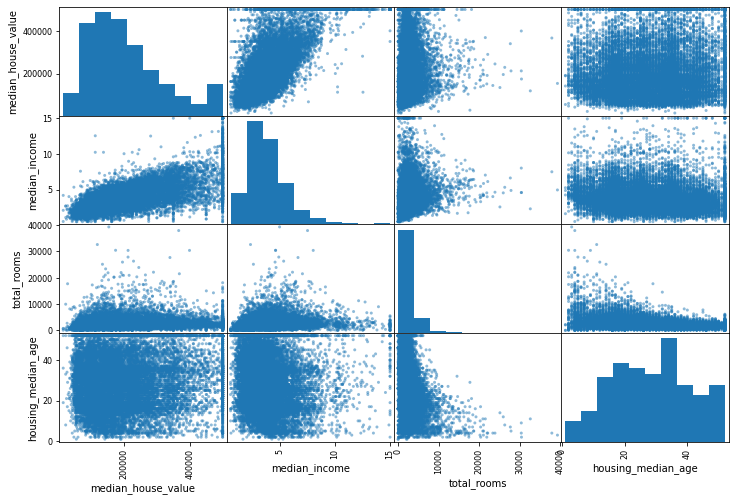

In [25]:
imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

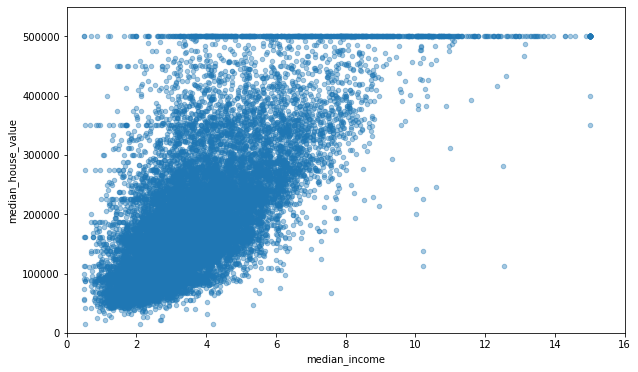

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",figsize=(10,6), alpha=0.4)
plt.axis([0,16,0,550000])

**Feature Engineering**

In [27]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574918,35.643021,28.655947,2622.391231,535.213224,1418.527798,496.885841,3.870790,206426.578428,0.212956,3.103945,5.434839
std,2.005139,2.142811,12.534525,2171.363228,421.124070,1137.469909,382.194131,1.903757,115101.402421,0.058306,11.603188,2.520729
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.750000,279.000000,2.559950,119175.000000,0.175447,2.434051,4.443640
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.533000,179650.000000,0.202963,2.817634,5.230475
75%,-118.010000,37.720000,37.000000,3122.000000,641.000000,1715.000000,599.000000,4.739600,264700.000000,0.239314,3.273248,6.056697
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


In [29]:
new_correlation = housing.corr()
new_correlation["median_house_value"].sort_values(ascending =False)

median_house_value          1.000000
median_income               0.691334
rooms_per_household         0.151990
total_rooms                 0.127498
housing_median_age          0.108481
households                  0.060161
total_bedrooms              0.043991
population_per_household   -0.021681
population                 -0.028239
longitude                  -0.043977
latitude                   -0.146227
bedrooms_per_room          -0.254016
Name: median_house_value, dtype: float64

**[Observation]:** The new 'bedrooms_per_housing' is highly correlated but in a reciprocatice way to the 'median_house_value'. So, the houses with lesser bedroom/room will tend to be more expensive.

(0.0, 16.0, 0.0, 550000.0)

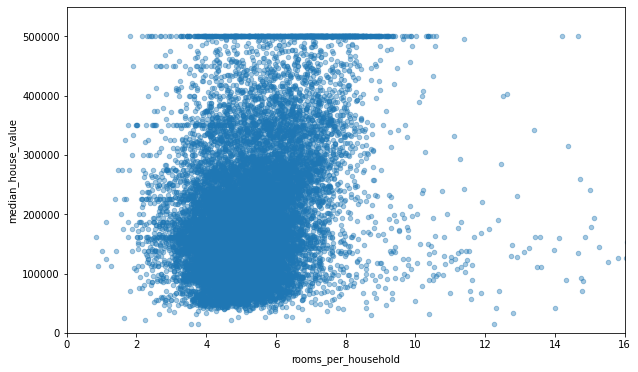

In [30]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",figsize=(10,6), alpha=0.4)
plt.axis([0,16,0,550000])

### Preparing the data

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 8007 to 230
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [33]:
housing_labels.shape

(16512,)

* **Data Cleansing**

In [34]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31,1072,NaN,781,281,1.6563,INLAND
10236,-117.92,33.87,33,1597,NaN,1888,423,3.0550,<1H OCEAN
4309,-118.32,34.09,44,2666,NaN,2297,726,1.6760,<1H OCEAN
3921,-118.56,34.20,35,2273,NaN,1431,403,4.0789,<1H OCEAN
16879,-122.39,37.60,34,707,NaN,381,156,4.3750,NEAR OCEAN


In [35]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12809,-121.47,38.61,31,1072,433.0,781,281,1.6563,INLAND
10236,-117.92,33.87,33,1597,433.0,1888,423,3.0550,<1H OCEAN
4309,-118.32,34.09,44,2666,433.0,2297,726,1.6760,<1H OCEAN
3921,-118.56,34.20,35,2273,433.0,1431,403,4.0789,<1H OCEAN
16879,-122.39,37.60,34,707,433.0,381,156,4.3750,NEAR OCEAN


* Filling NaN value by using simple Imputer

In [36]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="median")

In [37]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
# Imputer Basicalyy computes across all the attributes. to see this...
imputer.statistics_

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  433.   , 1159.   ,
        407.   ,    3.533])

In [39]:
#Check with median
housing_num.median().values

array([-118.5  ,   34.26 ,   29.   , 2123.   ,  433.   , 1159.   ,
        407.   ,    3.533])

* By using the imputer we created above transforming the training set by replacing the missing values by the learned medians

In [40]:
x = imputer.transform(housing_num)
x

array([[-118.11  ,   33.85  ,   36.    , ...,  482.    ,  157.    ,
           4.125 ],
       [-122.04  ,   37.33  ,   26.    , ..., 1264.    ,  429.    ,
           7.7643],
       [-117.74  ,   34.1   ,   29.    , ..., 2477.    ,  532.    ,
           3.5072],
       ...,
       [-119.17  ,   34.29  ,   18.    , ..., 1896.    ,  680.    ,
           5.2953],
       [-118.31  ,   34.06  ,   24.    , ..., 1268.    ,  426.    ,
           2.8202],
       [-122.2   ,   37.79  ,   40.    , ...,  667.    ,  235.    ,
           4.1739]])

In [41]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.1250
1,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643
2,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072
3,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518
4,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604
...,...,...,...,...,...,...,...,...
16507,-122.42,37.67,42.0,2274.0,429.0,1255.0,397.0,5.1205
16508,-115.55,32.79,22.0,565.0,162.0,692.0,141.0,1.2083
16509,-119.17,34.29,18.0,3932.0,724.0,1896.0,680.0,5.2953
16510,-118.31,34.06,24.0,1336.0,453.0,1268.0,426.0,2.8202


In [42]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.11,33.85,36.0,887.0,163.0,482.0,157.0,4.1250
1,-122.04,37.33,26.0,2690.0,401.0,1264.0,429.0,7.7643
2,-117.74,34.10,29.0,2742.0,488.0,2477.0,532.0,3.5072
3,-118.39,34.23,43.0,1193.0,299.0,1184.0,320.0,2.1518
4,-117.11,32.76,21.0,2226.0,600.0,1085.0,533.0,2.2604


* **Handling categorical Values**

In [43]:
housing_cat = housing["ocean_proximity"]
housing_cat.value_counts()

<1H OCEAN     7307
INLAND        5266
NEAR OCEAN    2090
NEAR BAY      1844
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
housing_cat.head()

8007      <1H OCEAN
18096     <1H OCEAN
5981         INLAND
3669      <1H OCEAN
14092    NEAR OCEAN
Name: ocean_proximity, dtype: object

**Convert categorical features into numerical features**

* Using Pandas

In [45]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 0, 2, 3, 0, 0, 0, 0], dtype=int64)

In [46]:
print(housing_categories[:10])

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')


* Using Scikit-learn'S OneHotEncoder

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

* Since 1 hot encoder returns a sparse matrix, need to change it to a dense array

In [48]:
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

##### Custom Transformations

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", 
                                                                                           "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.11,33.85,36,887,163.0,482,157,4.125,<1H OCEAN,5.649682,3.070064
1,-122.04,37.33,26,2690,401.0,1264,429,7.7643,<1H OCEAN,6.270396,2.946387
2,-117.74,34.1,29,2742,488.0,2477,532,3.5072,INLAND,5.154135,4.656015
3,-118.39,34.23,43,1193,299.0,1184,320,2.1518,<1H OCEAN,3.728125,3.7
4,-117.11,32.76,21,2226,600.0,1085,533,2.2604,NEAR OCEAN,4.17636,2.035647


# Setting up Pipeline for all the preprocessings

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ("Imputer", SimpleImputer(strategy = "median")),
                        ("attribs_adder", CombinedAttributesAdder()),
                        ("std_scaler",StandardScaler())
                       ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.08523298,
        -0.00292009, -0.45066285],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.33148459,
        -0.01357928, -0.97149216],
       [ 0.91513496, -0.72011354,  0.02744924, ..., -0.11136143,
         0.13376642, -0.53762897],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.13786673,
        -0.02720971, -0.4451879 ],
       [ 0.63085685, -0.73878116, -0.37146108, ..., -0.91194187,
        -0.01098173,  1.88075105],
       [-1.30921661,  1.0019753 ,  0.90505196, ..., -0.3666513 ,
        -0.02289502,  0.4161723 ]])

In [51]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, X, y=None):
        return self # do nothing
    
    def transform(self, X, y=None):
        return X[self.attibute_names].values




In [52]:
# complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [53]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [54]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91513496, -0.72011354,  0.02744924, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63085685, -0.73878116, -0.37146108, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30921661,  1.0019753 ,  0.90505196, ...,  0.        ,
         1.        ,  0.        ]])

In [55]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),
                                                ('cat_pipeline', cat_pipeline)
                                               ])

In [56]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.73060355, -0.83678622,  0.5859237 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.22941925,  0.78729756, -0.21189695, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91513496, -0.72011354,  0.02744924, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.201946  , -0.63144229, -0.85015347, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63085685, -0.73878116, -0.37146108, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30921661,  1.0019753 ,  0.90505196, ...,  0.        ,
         1.        ,  0.        ]])

## Selecting & Training Models

In [57]:
from sklearn.linear_model import LinearRegression
linReg= LinearRegression()

linReg.fit(housing_prepared, housing_labels)

LinearRegression()

In [58]:
# Trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data
some_data_prepared = full_pipeline.transform(some_data)

In [59]:
print("Prediction:", linReg.predict(some_data_prepared))
print("Actual labels:", list(some_labels))

Prediction: [232035.89112672 380482.2530773  112115.91222308 157188.4422259
 182226.68776252]
Actual labels: [219500, 474700, 121900, 161600, 126300]


In [60]:
from sklearn.metrics import mean_squared_error

housing_predictions = linReg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse =np.sqrt(lin_mse)
lin_rmse

67932.7700373929

#### Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg =DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [62]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

###### Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv= 10, scoring = "neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

In [64]:
def display_scores(scores):
    print("Scores:", scores)
    print("mean:", scores.mean())
    print("std deviation:", scores.std())

In [65]:
display_scores(lin_rmse)

Scores: 67932.7700373929
mean: 67932.7700373929
std deviation: 0.0


In [66]:
display_scores(tree_rmse_scores)

Scores: [69778.32728801 74034.80733342 70289.32228771 71918.6531281
 67463.48487834 71412.78890662 71259.02587768 69433.07377446
 72978.82557952 69917.38028865]
mean: 70848.56893425231
std deviation: 1791.91837627344


In [67]:
lin_scores = cross_val_score(linReg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66658.67084538 70302.86819962 71566.38526718 65233.82017541
 64574.58761208 69256.95688732 66787.77183138 71451.60918566
 65360.54454616 72252.68571338]
mean: 68344.59002635693
std deviation: 2793.4629458070845


In [68]:
from sklearn.ensemble import RandomForestRegressor

rfReg= RandomForestRegressor(random_state=29)
rfReg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=29)

In [69]:
housing_pred = rfReg.predict(housing_prepared)

rf_scores=cross_val_score(rfReg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

rf_rmse_scores = np.sqrt(-rf_scores)

display_scores(rf_rmse_scores)

Scores: [47810.25107843 51241.58204009 51344.54612338 47222.7603412
 47491.26556067 52464.13388224 48163.00514217 48820.31796374
 47462.08506298 51591.93026549]
mean: 49361.18774604013
std deviation: 1946.3745280089033


In [70]:
##Fine Tuning Model:[TODO ]

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [ 3, 10, 30],'max_features':[2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
             ]
rf_reg = RandomForestRegressor()
grid_search =GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [72]:
#To get the best combinations of hyperparameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [73]:
# To get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [74]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

63300.844258515426 {'max_features': 2, 'n_estimators': 3}
54812.12536210985 {'max_features': 2, 'n_estimators': 10}
51976.98716565104 {'max_features': 2, 'n_estimators': 30}
59558.774261821505 {'max_features': 4, 'n_estimators': 3}
51443.047261451575 {'max_features': 4, 'n_estimators': 10}
49801.44865766287 {'max_features': 4, 'n_estimators': 30}
57957.310815997225 {'max_features': 6, 'n_estimators': 3}
51416.522542180115 {'max_features': 6, 'n_estimators': 10}
49517.94681689888 {'max_features': 6, 'n_estimators': 30}
57776.59720155961 {'max_features': 8, 'n_estimators': 3}
51548.20782456965 {'max_features': 8, 'n_estimators': 10}
49353.062829815135 {'max_features': 8, 'n_estimators': 30}
61836.41194198173 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53382.946473578646 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59483.928598409075 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51970.64802752872 {'bootstrap': False, 'max_features': 3, 'n_estimat

In [75]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052706,0.006140,0.003395,0.006137,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.131660e+09,-4.265271e+09,-3.861146e+09,-3.619327e+09,-4.157580e+09,-4.006997e+09,2.351520e+08,18
1,0.172315,0.010595,0.006251,0.007656,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.104389e+09,-2.889336e+09,-2.970694e+09,-2.901028e+09,-3.156399e+09,-3.004369e+09,1.078543e+08,11
2,0.513822,0.017071,0.028134,0.006250,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.815192e+09,-2.618087e+09,-2.630058e+09,-2.575322e+09,-2.869378e+09,-2.701607e+09,1.175510e+08,9
3,0.084372,0.007656,0.003126,0.006252,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.744563e+09,-3.440343e+09,-3.445429e+09,-3.287579e+09,-3.818324e+09,-3.547248e+09,2.008178e+08,16
4,0.269014,0.006126,0.012505,0.006253,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.766670e+09,-2.489650e+09,-2.701867e+09,-2.586248e+09,-2.687501e+09,-2.646387e+09,9.738561e+07,6
5,0.875451,0.032440,0.025379,0.005948,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.552814e+09,-2.399449e+09,-2.501165e+09,-2.375868e+09,-2.571624e+09,-2.480184e+09,7.934307e+07,3
6,0.140793,0.009593,0.003200,0.003919,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.583488e+09,-3.384872e+09,-3.377439e+09,-3.192258e+09,-3.257191e+09,-3.359050e+09,1.338449e+08,14
7,0.483876,0.032435,0.012729,0.003726,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.792655e+09,-2.591369e+09,-2.544471e+09,-2.599141e+09,-2.690658e+09,-2.643659e+09,8.827553e+07,5
8,1.211231,0.103723,0.029298,0.009283,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.533825e+09,-2.410153e+09,-2.468701e+09,-2.345156e+09,-2.502301e+09,-2.452027e+09,6.733685e+07,2
9,0.153484,0.003279,0.003209,0.003930,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.333692e+09,-3.232826e+09,-3.295474e+09,-3.159828e+09,-3.668855e+09,-3.338135e+09,1.755553e+08,13


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_disttibs={
    "n_estimators" : randint(low = 1, high = 200),
    "max_features" : randint(low =1, high =8)
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_disttibs, n_iter = 10, cv =5, 
                                scoring = "neg_mean_squared_error", random_state=29)

In [80]:
pd.DataFrame(grid_search.cv_results_).to_excel("California Housing Price Predicted.xlsx")